In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('D:/Datamining/iris.csv', na_values = '?', names = ["sepal_length", "sepal_width","petal_length", "petal_width", "class"])
df = dataset

In [3]:
#資料轉換(one-hot)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df[["class"]]: 
    df[col] = le.fit_transform(df[col])

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 階層式分群 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn import cluster

In [18]:
from sklearn import cluster
from datetime import datetime

start = datetime.now()

hclust_fit = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(df) 

end = datetime.now()
time = end - start

print("分群時間：", time)

y = df['class'] 

cluster_labels = hclust_fit.labels_

分群時間： 0:00:00.006981


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [16]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

print(purity_score(y,cluster_labels))

1.0


In [17]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

#輸出Silhouette Coefficient指標
print("Silhouette Coefficient:",metrics.silhouette_score(df, cluster_labels, metric='euclidean'))

Silhouette Coefficient: 0.5780114722111267


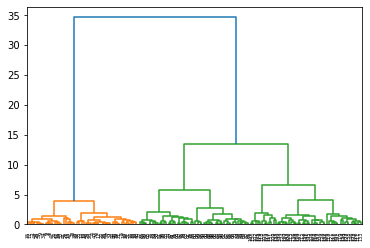

In [23]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

dendrogram = hierarchy.dendrogram(hierarchy.linkage(df, method='ward'))